In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [66]:
df_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [67]:
df_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [68]:
df_p.shape

(649, 33)

In [69]:
df_m.shape

(395, 33)

In [70]:
df_p.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [71]:
df_m.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [72]:
# create dictionary of mappings
rename_dict = {
    "Medu": "mothers_education", 
    "Mjob": "mothers_job", 
    "Fedu": "fathers_education",
    "Fjob": "fathers_job",

}

# rename columns
df_mrename = df_p.rename(columns=rename_dict)
df_prename = df_m.rename(columns=rename_dict)

# view new columns
df_mrename.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'mothers_education', 'fathers_education', 'mothers_job', 'fathers_job',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [73]:
df_prename.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'mothers_education', 'fathers_education', 'mothers_job', 'fathers_job',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [74]:
# Since I am only analyzing Parents education and profession's affecting student performance,
# I can drop all columns except Parents education, Profession, and Student Grades as well as the grading periods and failures.

#Selected = ['mothers_education', 'fathers_education', 'mothers_job', 'fathers_job', 'G1', 'G2', 'G3']
Selected = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
df_drop = df_mrename.drop(columns=Selected)
df_mnew = df_drop


In [75]:
Selected = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
df_drop = df_prename.drop(columns=Selected)
df_pnew = df_drop
df_pnew

,mothers_education,fathers_education,mothers_job,fathers_job,G1,G2,G3
0,4,4,at_home,teacher,5,6,6
1,1,1,at_home,other,5,5,6
2,1,1,at_home,other,7,8,10
3,4,2,health,services,15,14,15
4,3,3,other,other,6,10,10
...,...,...,...,...,...,...,...
390,2,2,services,services,9,9,9
391,3,1,services,services,14,16,16
392,1,1,other,other,10,8,7
393,3,2,services,other,11,12,10


In [76]:
df_pnew.shape

(395, 7)

In [77]:
df_mnew.shape

(649, 7)

In [78]:
df_mnew.head()

,mothers_education,fathers_education,mothers_job,fathers_job,G1,G2,G3
0,4,4,at_home,teacher,0,11,11
1,1,1,at_home,other,9,11,11
2,1,1,at_home,other,12,13,12
3,4,2,health,services,14,14,14
4,3,3,other,other,11,13,13


In [79]:
df_pnew.head()

,mothers_education,fathers_education,mothers_job,fathers_job,G1,G2,G3
0,4,4,at_home,teacher,5,6,6
1,1,1,at_home,other,5,5,6
2,1,1,at_home,other,7,8,10
3,4,2,health,services,15,14,15
4,3,3,other,other,6,10,10


In [80]:
# Summary statistics for both classes from each new dataset.

df_pnew.describe()

,mothers_education,fathers_education,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.749367,2.521519,10.908861,10.713924,10.415190
std,1.094735,1.088201,3.319195,3.761505,4.581443
min,0.000000,0.000000,3.000000,0.000000,0.000000
25%,2.000000,2.000000,8.000000,9.000000,8.000000
50%,3.000000,2.000000,11.000000,11.000000,11.000000
75%,4.000000,3.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,19.000000,19.000000,20.000000


In [81]:
df_mnew.describe()

,mothers_education,fathers_education,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.306626,11.399076,11.570108,11.906009
std,1.134552,1.099931,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,10.000000,10.000000,10.000000
50%,2.000000,2.000000,11.000000,11.000000,12.000000
75%,4.000000,3.000000,13.000000,13.000000,14.000000
max,4.000000,4.000000,19.000000,19.000000,19.000000


In [87]:
sum_grades_m = df_mnew['G1'] + df_mnew['G2'] + df_mnew['G3']
print("Cummulative grades for Math class studetns:", sum_grades_m) 
print(" ")
sum_grades_p = df_pnew['G1'] + df_pnew['G2'] + df_pnew['G3']
print("Cummulative grades for Port class studetns:", sum_grades_p) 


Cummulative grades for Math class studetns: 0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Length: 649, dtype: int64
 
Cummulative grades for Port class studetns: 0      17
1      16
2      25
3      44
4      26
       ..
390    27
391    46
392    25
393    33
394    26
Length: 395, dtype: int64


Explore Again Math class and Portuguese class

<Axes: xlabel='mothers_education', ylabel='Count'>

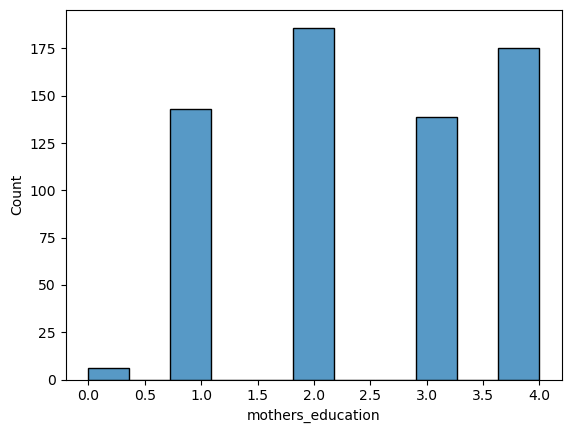

In [82]:
sns.histplot(df_mnew['mothers_education'])

<Axes: xlabel='fathers_education', ylabel='Count'>

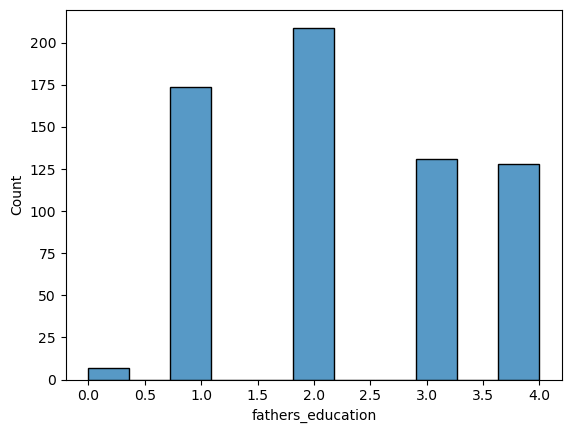

In [84]:
sns.histplot(df_mnew['fathers_education'])

<Axes: xlabel='mothers_job', ylabel='Count'>

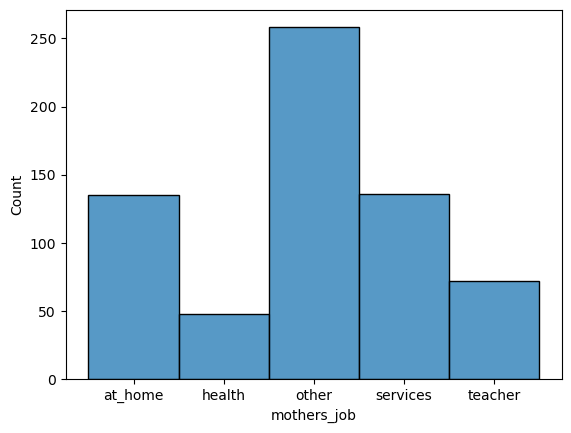

In [95]:
sns.histplot(df_mnew['mothers_job'])

<Axes: xlabel='fathers_job', ylabel='Count'>

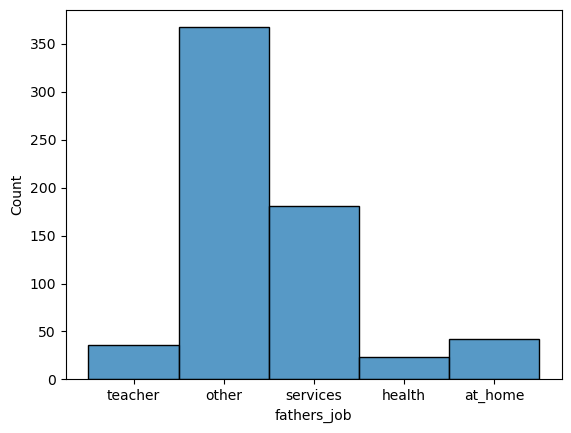

In [86]:
sns.histplot(df_mnew['fathers_job'])

<Axes: ylabel='Count'>

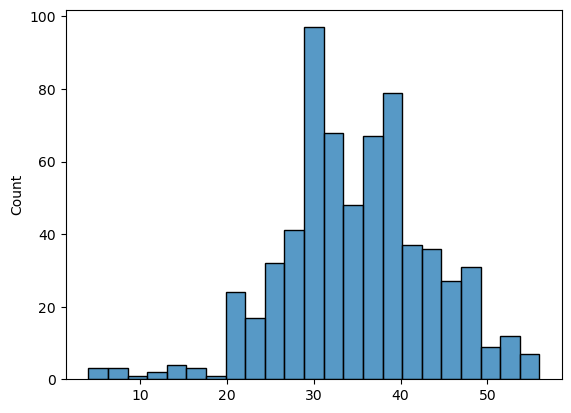

In [89]:
sns.histplot(sum_grades_m)

<Axes: xlabel='mothers_education', ylabel='Count'>

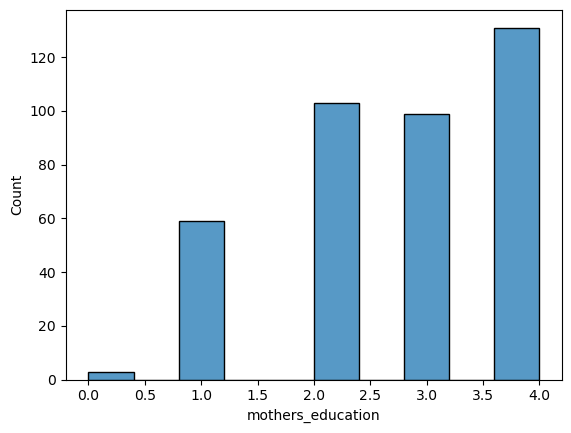

In [90]:
sns.histplot(df_pnew['mothers_education'])

<Axes: xlabel='fathers_education', ylabel='Count'>

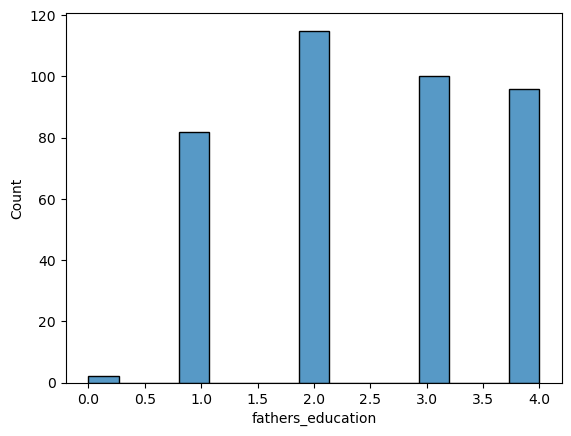

In [91]:
sns.histplot(df_pnew['fathers_education'])

<Axes: xlabel='mothers_job', ylabel='Count'>

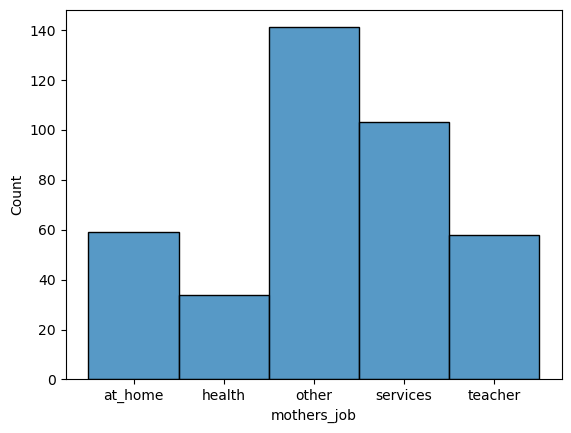

In [92]:
sns.histplot(df_pnew['mothers_job'])

<Axes: xlabel='fathers_job', ylabel='Count'>

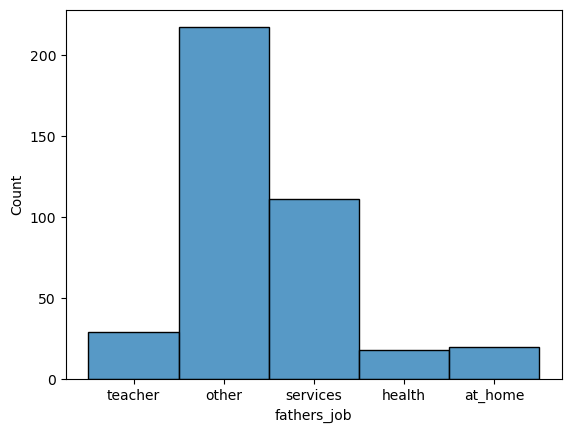

In [94]:
sns.histplot(df_pnew['fathers_job'])

<Axes: ylabel='Count'>

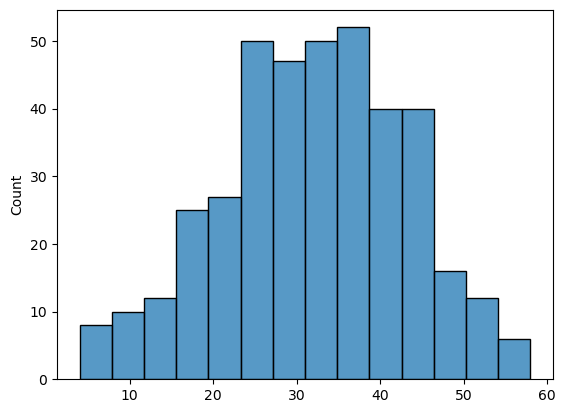

In [96]:
sns.histplot(sum_grades_p)

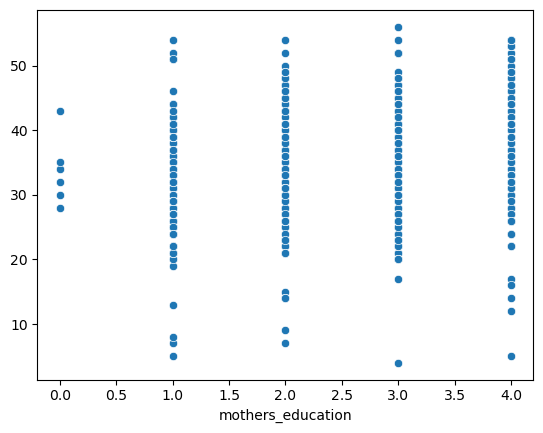

In [99]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_mnew, x='mothers_education', y=sum_grades_m)
plt.show()

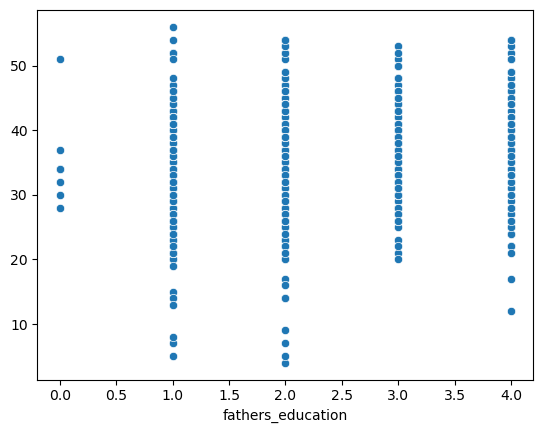

In [100]:
sns.scatterplot(data=df_mnew, x='fathers_education', y=sum_grades_m)
plt.show()

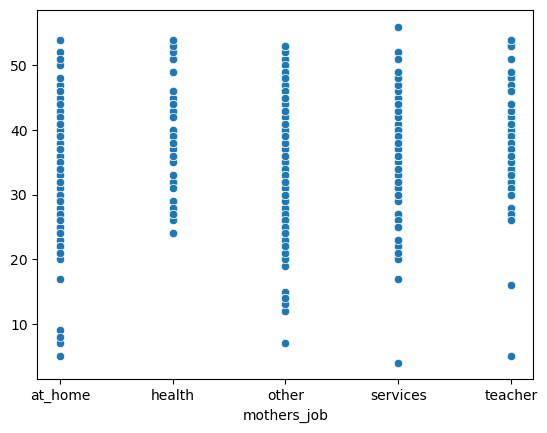

In [101]:
sns.scatterplot(data=df_mnew, x='mothers_job', y=sum_grades_m)
plt.show()

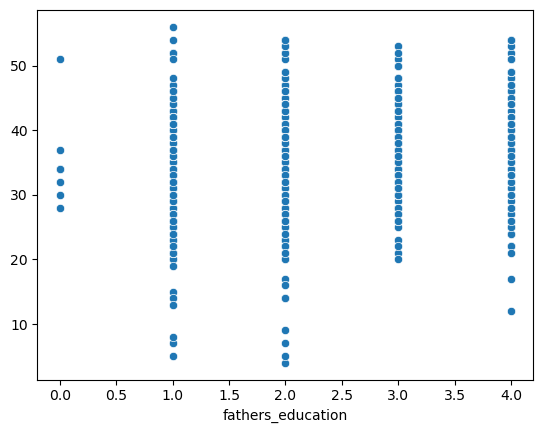

In [102]:
sns.scatterplot(data=df_mnew, x='fathers_education', y=sum_grades_m)
plt.show()

In [111]:
df_mnew = df_mnew.apply(pd.to_numeric, errors='coerce')

df_pnew = df_pnew.apply(pd.to_numeric, errors='coerce')

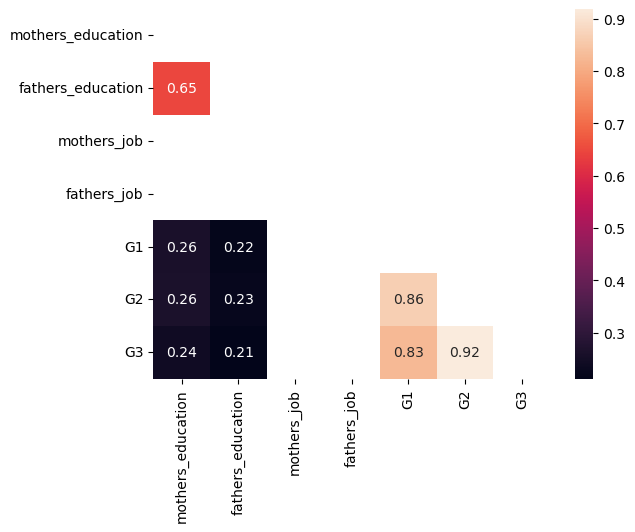

In [110]:
mask = np.triu(np.ones_like(df_mnew.corr(), dtype=bool))

sns.heatmap(df_mnew.corr(), annot=True, mask=mask)
plt.show()

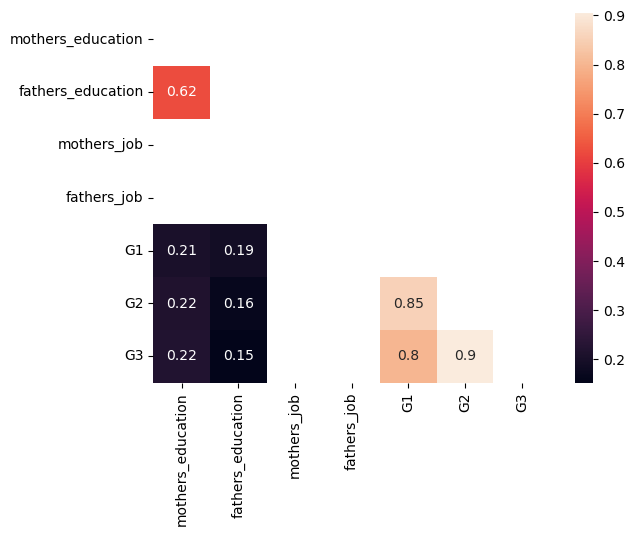

In [112]:
mask = np.triu(np.ones_like(df_pnew.corr(), dtype=bool))

sns.heatmap(df_pnew.corr(), annot=True, mask=mask)
plt.show()

In [113]:
# the newly transformed dataset will be saved in this file name

df_mnew.to_csv('../data/student-mat-cleaned.csv')
df_pnew.to_csv('../data/student-por-cleaned.csv')